#Creational Design Patterns

In software engineering, creational design patterns are design patterns that deal with object creation mechanisms, trying to create objects in a manner suitable to the situation. The basic form of object creation could result in design problems or added complexity to the design. Creational design patterns solve this problem by somehow controlling this object creation.

# Abstract Factory

Creates an instance of several families of classes (Source: https://sourcemaking.com/design_patterns/abstract_factory)

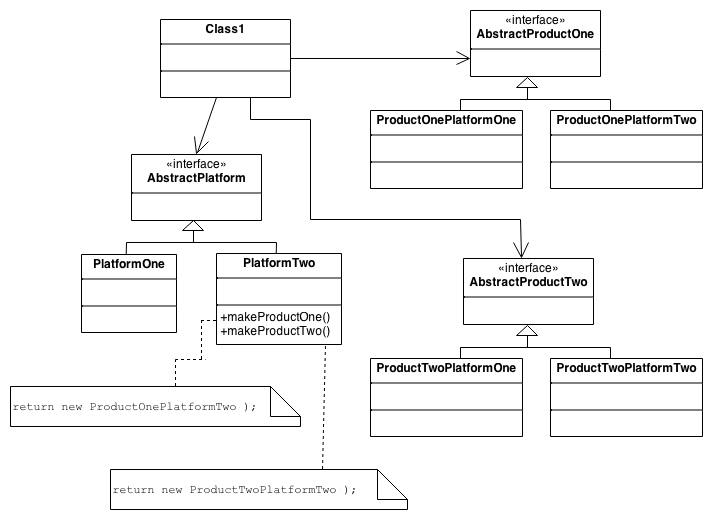

In [1]:
# Abstract Factory Interface
class AbstractFactory:
    def create_product_a(self):
        pass

    def create_product_b(self):
        pass

# Concrete Factory 1
class ConcreteFactory1(AbstractFactory):
    def create_product_a(self):
        return ConcreteProductA1()

    def create_product_b(self):
        return ConcreteProductB1()

# Concrete Factory 2
class ConcreteFactory2(AbstractFactory):
    def create_product_a(self):
        return ConcreteProductA2()

    def create_product_b(self):
        return ConcreteProductB2()

# Abstract Product A
class AbstractProductA:
    def method_a(self):
        pass

# Concrete Product A1
class ConcreteProductA1(AbstractProductA):
    def method_a(self):
        print("Product A1 method")

# Concrete Product A2
class ConcreteProductA2(AbstractProductA):
    def method_a(self):
        print("Product A2 method")

# Abstract Product B
class AbstractProductB:
    def method_b(self):
        pass

# Concrete Product B1
class ConcreteProductB1(AbstractProductB):
    def method_b(self):
        print("Product B1 method")

# Concrete Product B2
class ConcreteProductB2(AbstractProductB):
    def method_b(self):
        print("Product B2 method")

# Client
def client_code(factory):
    product_a = factory.create_product_a()
    product_b = factory.create_product_b()

    product_a.method_a()
    product_b.method_b()

# Usage
if __name__ == "__main__":
    factory1 = ConcreteFactory1()
    client_code(factory1)

    factory2 = ConcreteFactory2()
    client_code(factory2)


Product A1 method
Product B1 method
Product A2 method
Product B2 method


#Builder

Separates object construction from its representation (Source: https://sourcemaking.com/design_patterns/builder)


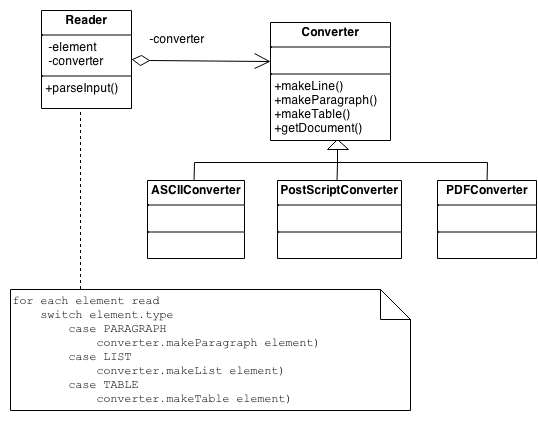

In [2]:
# Product
class Product:
    def __init__(self):
        self.part_a = None
        self.part_b = None
        self.part_c = None

    def __str__(self):
        return f"Part A: {self.part_a}, Part B: {self.part_b}, Part C: {self.part_c}"

# Builder Interface
class Builder:
    def build_part_a(self):
        pass

    def build_part_b(self):
        pass

    def build_part_c(self):
        pass

    def get_product(self):
        pass

# Concrete Builder
class ConcreteBuilder(Builder):
    def __init__(self):
        self.product = Product()

    def build_part_a(self):
        self.product.part_a = "Part A"

    def build_part_b(self):
        self.product.part_b = "Part B"

    def build_part_c(self):
        self.product.part_c = "Part C"

    def get_product(self):
        return self.product

# Director
class Director:
    def __init__(self, builder):
        self.builder = builder

    def construct(self):
        self.builder.build_part_a()
        self.builder.build_part_b()
        self.builder.build_part_c()

# Client
if __name__ == "__main__":
    builder = ConcreteBuilder()
    director = Director(builder)
    director.construct()
    product = builder.get_product()
    print(product)

Part A: Part A, Part B: Part B, Part C: Part C


#Factory Method

Creates an instance of several derived classes (Source: https://sourcemaking.com/design_patterns/factory_method)


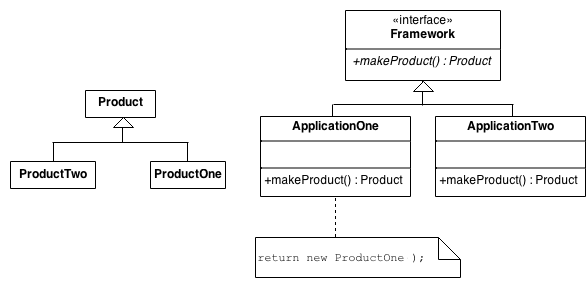

In [3]:
from abc import ABC, abstractmethod

# Product Interface
class Product(ABC):
    @abstractmethod
    def operation(self):
        pass

# Concrete Products
class ConcreteProduct1(Product):
    def operation(self):
        return "ConcreteProduct1 operation"

class ConcreteProduct2(Product):
    def operation(self):
        return "ConcreteProduct2 operation"

# Creator Interface
class Creator(ABC):
    @abstractmethod
    def factory_method(self):
        pass

    def some_operation(self):
        product = self.factory_method()
        result = f"Creator: {product.operation()}"
        return result

# Concrete Creators
class ConcreteCreator1(Creator):
    def factory_method(self):
        return ConcreteProduct1()

class ConcreteCreator2(Creator):
    def factory_method(self):
        return ConcreteProduct2()

# Client
if __name__ == "__main__":
    creator = ConcreteCreator1()
    print(creator.some_operation())

    creator = ConcreteCreator2()
    print(creator.some_operation())


Creator: ConcreteProduct1 operation
Creator: ConcreteProduct2 operation


#Object Pool

Avoid expensive acquisition and release of resources by recycling objects that are no longer in use (Source: https://sourcemaking.com/design_patterns/object_pool)


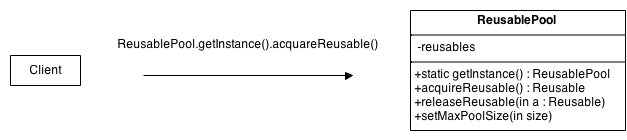

In [4]:
class DatabaseConnection:
    def __init__(self, connection_id):
        self.connection_id = connection_id

    def execute_query(self, query):
        print(f"Executing query '{query}' on connection {self.connection_id}")

class ReusablePool:
    _instance = None

    @staticmethod
    def get_instance():
        if ReusablePool._instance is None:
            ReusablePool._instance = ReusablePool()
        return ReusablePool._instance

    def __init__(self):
        if ReusablePool._instance is not None:
            raise Exception("This class is a singleton!")
        else:
            ReusablePool._instance = self
        self._pool = []
        self._max_connections = 5  # Maximum number of connections allowed in the pool

    def acquire_connection(self):
        if len(self._pool) > 0:
            return self._pool.pop()
        elif len(self._pool) < self._max_connections:
            return self.create_connection()
        else:
            raise Exception("No available connections in the pool.")

    def release_connection(self, connection):
        self._pool.append(connection)

    def create_connection(self):
        connection_id = len(self._pool) + 1  # Simulating unique connection IDs
        print(f"Creating new connection with ID {connection_id}")
        return DatabaseConnection(connection_id)

# Example usage
if __name__ == "__main__":
    pool = ReusablePool.get_instance()

    # Acquire connections from the pool
    conn1 = pool.acquire_connection()
    conn2 = pool.acquire_connection()

    # Use the connections
    conn1.execute_query("SELECT * FROM table1")
    conn2.execute_query("UPDATE table2 SET column1 = 'value'")

    # Release connections back to the pool
    pool.release_connection(conn1)
    pool.release_connection(conn2)

    # Acquire a new connection
    conn3 = pool.acquire_connection()
    conn3.execute_query("INSERT INTO table3 (column1) VALUES ('value')")


Creating new connection with ID 1
Creating new connection with ID 1
Executing query 'SELECT * FROM table1' on connection 1
Executing query 'UPDATE table2 SET column1 = 'value'' on connection 1
Executing query 'INSERT INTO table3 (column1) VALUES ('value')' on connection 1


#Prototype
A fully initialized instance to be copied or cloned (Source: https://sourcemaking.com/design_patterns/prototype)

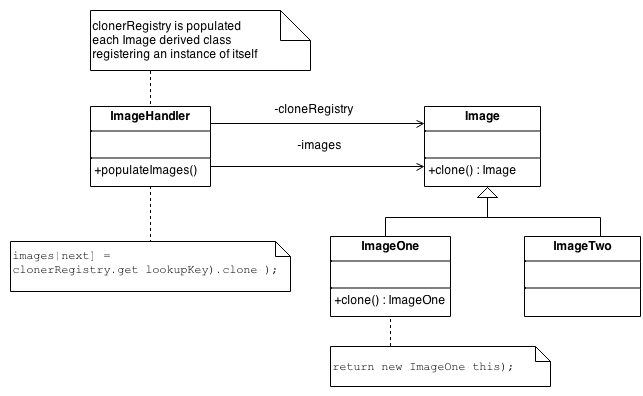

In [5]:
import copy

class Prototype:
    def __init__(self):
        self._objects = {}

    def register_object(self, name, obj):
        self._objects[name] = obj

    def unregister_object(self, name):
        del self._objects[name]

    def clone(self, name, **attrs):
        obj = copy.deepcopy(self._objects.get(name))
        obj.__dict__.update(attrs)
        return obj

# Example class to be used as a prototype
class Car:
    def __init__(self):
        self.make = "Generic"
        self.model = "Car"
        self.year = "2022"

    def __str__(self):
        return f"{self.year} {self.make} {self.model}"

# Example usage
if __name__ == "__main__":
    prototype = Prototype()

    # Registering a prototype object
    car_prototype = Car()
    prototype.register_object("car", car_prototype)

    # Cloning the prototype object and customizing attributes
    car_clone = prototype.clone("car", make="Toyota", model="Camry", year="2020")
    print(car_clone)  # Output: 2020 Toyota Camry


2020 Toyota Camry


#Singleton
A class of which only a single instance can exist (Source: https://sourcemaking.com/design_patterns/prototype)

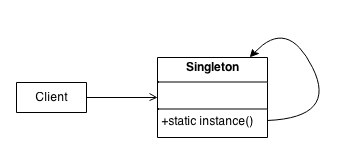

In [6]:
class Singleton:
    _instance = None

    @staticmethod
    def get_instance():
        """ Static access method. """
        if Singleton._instance is None:
            Singleton._instance = Singleton()
        return Singleton._instance

    def __init__(self):
        """ Private constructor. """
        if Singleton._instance is not None:
            raise Exception("This class is a singleton!")
        else:
            Singleton._instance = self

if __name__ == "__main__":
    # Get the singleton instance
    instance1 = Singleton.get_instance()
    instance2 = Singleton.get_instance()

    print(instance1 is instance2)  # Output: True

True
